<a href="https://colab.research.google.com/github/Korniev/Data-Sciense/blob/main/hw_11/hw_11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Домашнє завдання № 11

В якості домашнього завдання вам пропонується створити рекурентну нейронну мережу за допомогою механізмів Keras, яка буде класифікувати рецензії із датасету imdb.

На відміну від прикладу в модулі 9 ми використаємо рекурентну нейронну мережу. Поекспериментуйте з будовою мережі - RNN, LSTM, двостороння та глибока.

Порівняйте результати та зробіть висновки.

Імпортуємо усі потрібні нам бібліотеки:

In [1]:
import matplotlib.pyplot as plt
from keras.datasets import imdb
from keras.utils import pad_sequences
from keras.models import Sequential
from keras.layers import Embedding, SimpleRNN, Dense, Dropout
from keras.regularizers import l2

##Звичайна RNN

Супер, почнемо з реалізаціїї звичайної базової RNN і подивимось на результати, які ми отримаємо.

Для початку потрібно завантажити датасет imdb

Для цього встановлюємо гіперпараметри:

In [2]:
max_features = 10000
maxlen = 500

І завантажимо датасет imdb:

In [3]:
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)

Далі зробимо так званий паддінг послідовностей, тобто, перетворемо відгуки на вектори:

In [4]:
x_train = pad_sequences(x_train, maxlen=maxlen)
x_test = pad_sequences(x_test, maxlen=maxlen)

Далі будуємо нашу базову RNN:

In [22]:
model = Sequential()
model.add(Embedding(max_features, 32))
model.add(SimpleRNN(32))
model.add(Dense(1, activation='sigmoid', kernel_regularizer=l2(0.01)))

І робимо компліляцію, в якій передаємо оптимізатор RMSprop, функцію втрат бінарної кросентропії та у якості метрики як завжди передаємо точність:

In [23]:
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])

Відобразимо нашу архітектуру моделі:

In [24]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_5 (Embedding)     (None, None, 32)          320000    
                                                                 
 simple_rnn_5 (SimpleRNN)    (None, 32)                2080      
                                                                 
 dense_4 (Dense)             (None, 1)                 33        
                                                                 
Total params: 322113 (1.23 MB)
Trainable params: 322113 (1.23 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Далі проводимо навчання нашої моделі на 10 епохах та розміром бачу у 128:

In [25]:
history = model.fit(x_train, y_train, epochs=6, batch_size=128, validation_split=0.3)

Epoch 1/6
137/137 [==============================] - 24s 165ms/step - loss: 0.6334 - acc: 0.6513 - val_loss: 0.5548 - val_acc: 0.7279
Epoch 2/6
137/137 [==============================] - 23s 167ms/step - loss: 0.4248 - acc: 0.8291 - val_loss: 0.3879 - val_acc: 0.8508
Epoch 3/6
137/137 [==============================] - 22s 158ms/step - loss: 0.3463 - acc: 0.8742 - val_loss: 0.3948 - val_acc: 0.8488
Epoch 4/6
137/137 [==============================] - 20s 149ms/step - loss: 0.3045 - acc: 0.8919 - val_loss: 0.4312 - val_acc: 0.8275
Epoch 5/6
137/137 [==============================] - 22s 163ms/step - loss: 0.2662 - acc: 0.9110 - val_loss: 0.3623 - val_acc: 0.8664
Epoch 6/6
137/137 [==============================] - 22s 163ms/step - loss: 0.2326 - acc: 0.9235 - val_loss: 0.3753 - val_acc: 0.8657


Також візуалізуємо отримані результати функцій втрат та метрики точності:

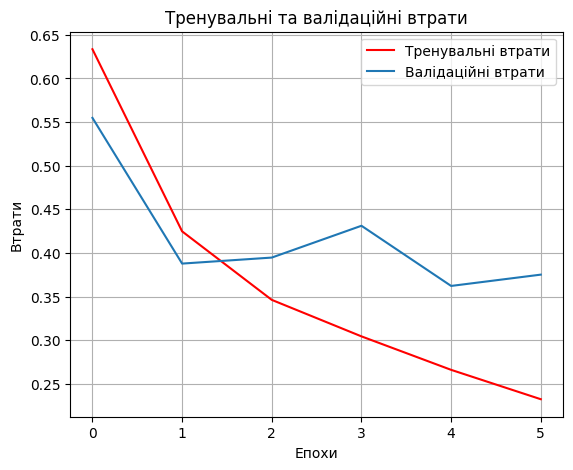

In [26]:
plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Тренувальні втрати', color='red')
plt.plot(history.history['val_loss'], label='Валідаційні втрати')
plt.title('Тренувальні та валідаційні втрати')
plt.xlabel('Епохи')
plt.ylabel('Втрати')
plt.grid(True)
plt.legend()


plt.show()

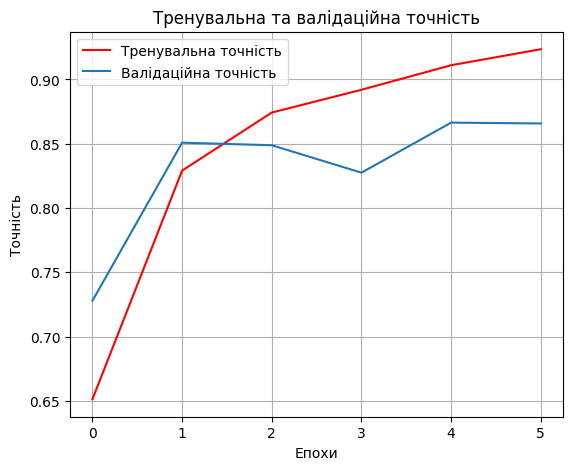

In [27]:
plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 2)
plt.plot(history.history['acc'], label='Тренувальна точність', color='red')
plt.plot(history.history['val_acc'], label='Валідаційна точність')
plt.title('Тренувальна та валідаційна точність')
plt.xlabel('Епохи')
plt.ylabel('Точність')
plt.grid(True)
plt.legend()

plt.show()

Після навчання моделі, ми можете оцінити її ефективність на тестовому наборі даних:

In [28]:
predictions = model.predict(x_test)

# Для отримання зрозумілішого вигляду прогнозів, їх можна перетворити в бінарний формат:
binary_predictions = [1 if pred > 0.5 else 0 for pred in predictions]

# Для порівняння можна вивести деякі прогнозовані значення поряд з фактичними значеннями
for i in range(10):
    print(f"Прогнозоване: {binary_predictions[i]}, Фактичне: {y_test[i]}\n")

# Додатковий крок: Оцінка моделі
# Це дасть загальну точність моделі на тестових даних
test_loss, test_acc = model.evaluate(x_test, y_test)
print('Тестові втрати: {}'.format(test_loss))
print('Тестова точність: {}'.format(test_acc))


782/782 [==============================] - 19s 24ms/step
Прогнозоване: 0, Фактичне: 0

Прогнозоване: 1, Фактичне: 1

Прогнозоване: 0, Фактичне: 1

Прогнозоване: 0, Фактичне: 0

Прогнозоване: 1, Фактичне: 1

Прогнозоване: 1, Фактичне: 1

Прогнозоване: 1, Фактичне: 1

Прогнозоване: 0, Фактичне: 0

Прогнозоване: 1, Фактичне: 0

Прогнозоване: 1, Фактичне: 1

782/782 [==============================] - 19s 24ms/step - loss: 0.3921 - acc: 0.8548
Тестові втрати: 0.3920994997024536
Тестова точність: 0.8548399806022644


Як бачимо, не найкращі результати. Хоча на тренувальних даних ми доходимо до точності у 95%, то на тестових - тільки 80..

Тому я застосував для повнозвʼязного шару Dense коефіцієнт регуляризації L2 0.01 для того, щоб зменшити перенавчання.  Зараз на виході наша модель показує 92% точності на тренувальних і 87% точності на тестових даних.